<a href="https://colab.research.google.com/github/Luana-Moraes/projetossigmoidal2023/blob/main/Lisboa_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2023-03-19/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id: identificador
* name: nome do imóvel
* host_id: identificador do anfitrião
* host_name: nome do anfitrião
* neighbourhood_group: região do bairro
* neighbourhood: bairro
* latitude: coordenada de latitude do imóvel
* longitude: coordenada de longitude do imóvel
* room_type: tipo de imóvel alugado
* price: preço da diária de aluguel
* minimum_nights: mínimo de noites para alugar
* number_of_reviews: número de avaliações do imóvel
* last_review: data da última avaliação
* reviews_per_month: número de avaliações por mês
* calculated_host_listings_count: número de imóveis do anfitrião
* availability_365: dias disponíveis do imóvel por no ano
* number_of_reviews_ltm: número de avaliações no último ano
* license: numero da licença

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45558745,FLH Baixa-Chiado Library Loft,3953109,Feels Like Home,Lisboa,Santa Maria Maior,38.710320,-9.138140,Entire home/apt,161,1,28,2023-03-07,1.32,306,288,17,35073/AL
1,33179882,Palm Guesthouse,152854735,Luis,Cascais,Cascais e Estoril,38.699930,-9.421570,Private room,81,5,0,NaN,NaN,5,290,0,18808/AL
2,836176843011037443,"Lisbon, renewed T1 apartment with pateo near M...",185689002,GAL - Gestão De Alojamento Local,Lisboa,Arroios,38.720987,-9.137193,Entire home/apt,94,1,0,NaN,NaN,20,262,0,50802/AL
3,1199811,Best Deal Lisboa Alfama Fado apart.,6552656,Francisco,Lisboa,Santa Maria Maior,38.710540,-9.130080,Entire home/apt,77,3,264,2023-03-16,2.31,1,255,59,46120/AL
4,26093410,Santa Liberdade Flat - Liberdade Avenue at Lisbon,348308512,Margarida,Lisboa,Santo Antnio,38.720410,-9.144350,Entire home/apt,110,3,1,2019-09-15,0.02,4,0,0,64304/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame : 20097 entradas; 18 variáveis.

df.shape

(20097, 18)

In [5]:
# verificar as 5 primeiras entradas do dataset

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


reviews_per_month                 0.115639
last_review                       0.115639
license                           0.059561
name                              0.000448
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

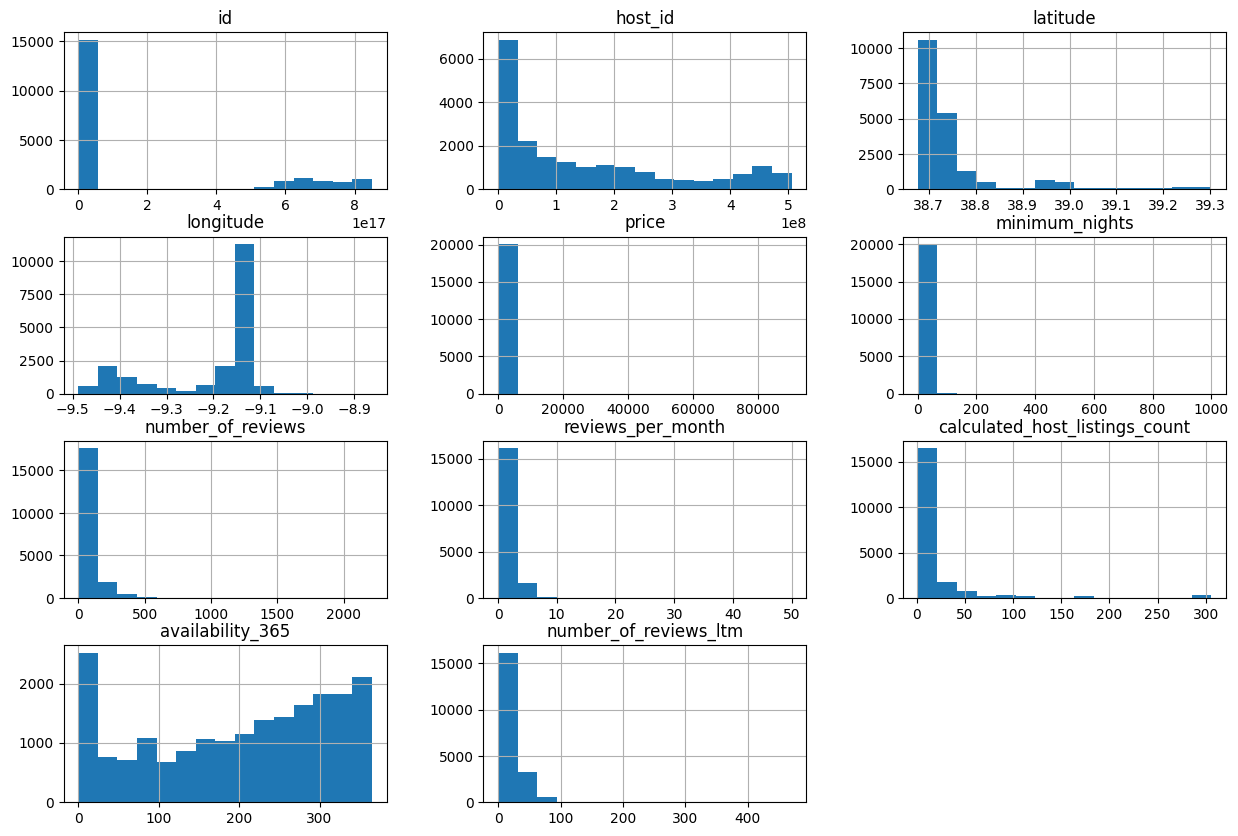

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price``

df.price.median()


90.0

### **Q4. Qual a correlação existente entre as variáveis**

In [9]:
# criar uma matriz de correlação

# mostrar a matriz de correlação

corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.000633,-0.018666,-0.019663,-0.006143,0.002929
minimum_nights,-0.000633,1.000000,-0.052345,-0.070057,0.000931,-0.018515
number_of_reviews,-0.018666,-0.052345,1.000000,0.650120,-0.090853,-0.060225
reviews_per_month,-0.019663,-0.070057,0.650120,1.000000,-0.039254,0.048227
calculated_host_listings_count,-0.006143,0.000931,-0.090853,-0.039254,1.000000,0.065407
availability_365,0.002929,-0.018515,-0.060225,0.048227,0.065407,1.000000


<Axes: >

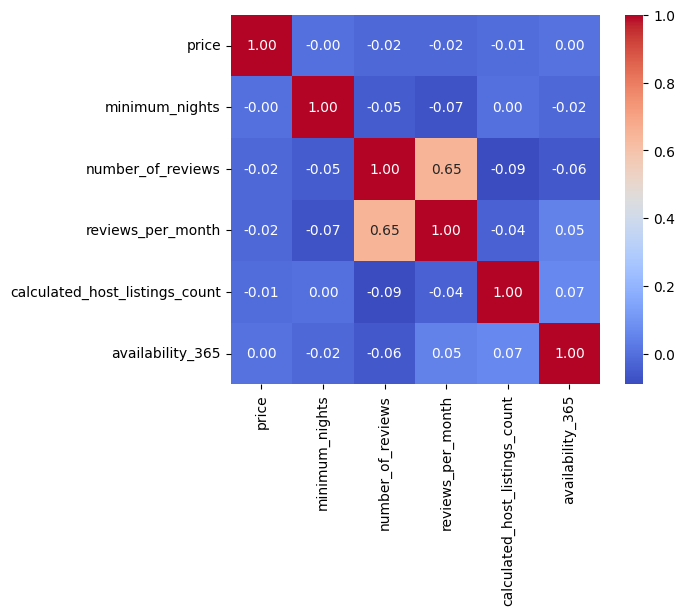

In [10]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square=True, linecolor='white', annot=True)


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [11]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()


Entire home/apt    15363
Private room        4269
Shared room          236
Hotel room           229
Name: room_type, dtype: int64

In [12]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts() / df.shape[0]


Entire home/apt    0.764442
Private room       0.212420
Shared room        0.011743
Hotel room         0.011395
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [13]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]




neighbourhood
Alguber                                     630.000000
Vialonga                                    548.666667
Cardosas                                    353.000000
Aveiras de Baixo                            335.000000
Algueiro-Mem Martins                        315.277778
Marvila                                     313.969072
Alenquer (Santo Estvo e Triana)             307.444444
Penha de Frana                              277.408421
Alhandra, So Joo dos Montes e Calhandriz    239.900000
Ribamar                                     239.043478
Name: price, dtype: float64

In [14]:
df.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Sintra                 186.845136
Alenquer               179.492958
Cascais                171.807173
Vila Franca De Xira    147.092593
Azambuja               146.000000
Lourinh                139.239609
Lisboa                 134.578138
Cadaval                133.000000
Mafra                  131.127211
Torres Vedras          128.448000
Name: price, dtype: float64

In [15]:
df.neighbourhood_group.value_counts()

Lisboa                   14052
Cascais                   1924
Sintra                    1285
Mafra                     1187
Lourinh                    409
Oeiras                     342
Torres Vedras              250
Loures                     197
Amadora                    154
Odivelas                    78
Alenquer                    71
Vila Franca De Xira         54
Cadaval                     52
Sobral De Monte Agrao       19
Azambuja                    13
Arruda Dos Vinhos           10
Name: neighbourhood_group, dtype: int64

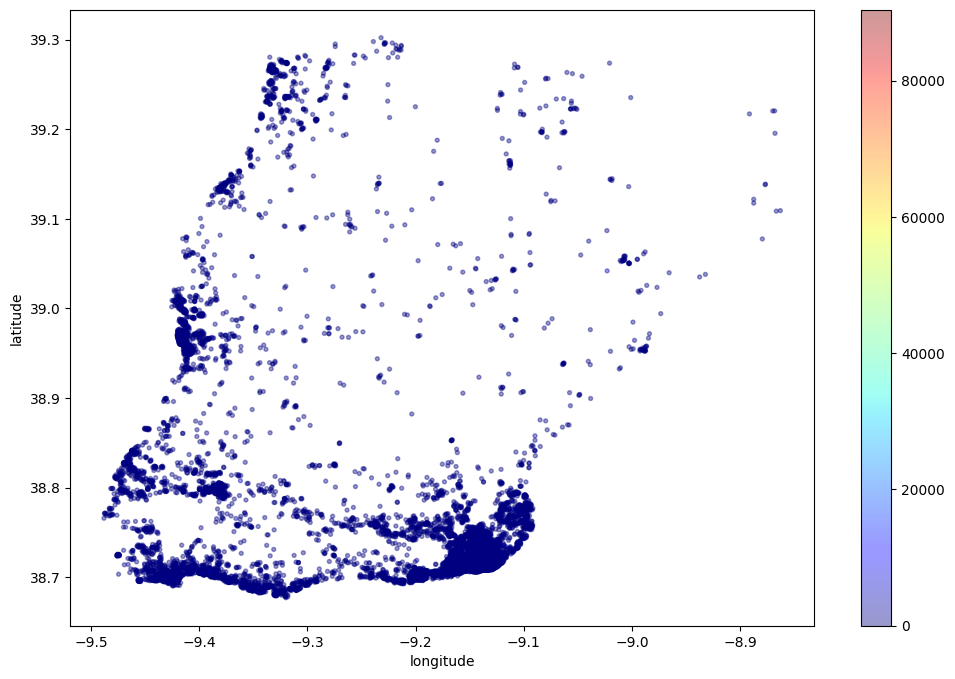

In [16]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y= 'latitude', alpha=0.4, c=df['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [17]:
# ver a média da coluna `minimum_nights``

df.minimum_nights.median()

2.0

In [18]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.009700e+04,2.009700e+04,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,17773.000000,20097.000000,20097.000000,20097.000000
mean,1.723415e+17,1.485494e+08,38.759894,-9.207933,139.684082,4.233219,58.604518,1.430895,17.871075,199.480420,16.505250
std,3.049687e+17,1.543363e+08,0.110797,0.113758,874.040097,16.959417,87.876376,1.421123,43.592433,117.121157,20.251572
min,6.499000e+03,1.445500e+04,38.677150,-9.487890,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.828760e+07,1.763890e+07,38.710820,-9.284210,63.000000,1.000000,4.000000,0.400000,1.000000,96.000000,1.000000
50%,3.393347e+07,8.462799e+07,38.717460,-9.147160,90.000000,2.000000,23.000000,1.010000,4.000000,222.000000,9.000000
75%,5.422312e+07,2.370778e+08,38.741810,-9.134840,136.000000,3.000000,74.000000,2.070000,14.000000,302.000000,26.000000
max,8.500310e+17,5.056348e+08,39.302130,-8.862850,90400.000000,1000.000000,2213.000000,49.990000,306.000000,365.000000,470.000000


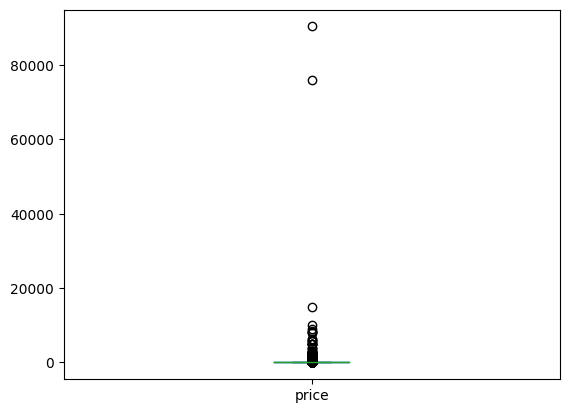

In [19]:
df.price.plot(kind="box");

## Conclusões

A partir dos dados provenientes do Airbnb de Lisboa, evidenciou-se que a região metropolitana possui preço médio de diária de 90 dólares.

Os tipos de imóvel mais alugado são apartamento ou casa inteira, seguido de quarto privado. A região de Sintra apresenta a média de preço mais cara, apesar de estar em terceiro lugar em quantidade de imóveis disponíveis para alugar.

O presente dataset possui percentagem de até 11.56% de dados ausentes. Também é possível perceber que há outliers.

Por fim, trata-se de análise inicial da versão resumida do banco de dados. Recomenda-se que seja usado, em uma próxima análise exploratória, o dataset versão completa.